In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [22]:
delivery_data=pd.read_csv('delivery_time.csv')
delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [23]:
#perform initial analysis

In [24]:
delivery_data.shape

(21, 2)

In [25]:
delivery_data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [26]:
delivery_data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [27]:
delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [28]:
#ASSUMPTIONS CHECK

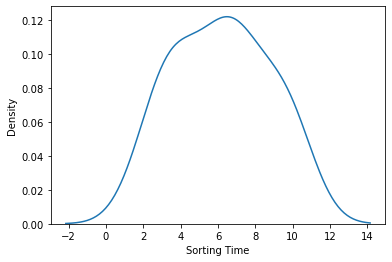

In [29]:
#1.Normality test
sns.distplot(a=delivery_data['Sorting Time'],hist=False)
plt.show()

In [30]:
delivery_data['Sorting Time'].skew()

0.047115474210530174

In [31]:
delivery_data['Sorting Time'].kurtosis()

-1.14845514534878

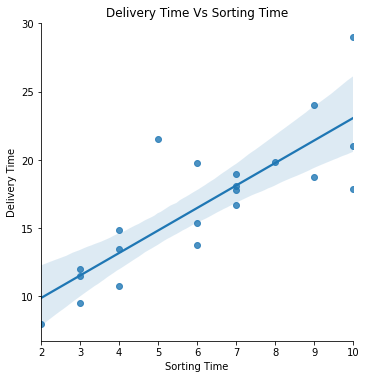

In [32]:
#2.Linearity Test
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery_data)
plt.title('Delivery Time Vs Sorting Time')
plt.show()

In [33]:
#Model building using StatsModels


In [34]:
delivery_data.rename(columns={"Delivery Time":"DeliveryTime","Sorting Time":"SortingTime"},inplace=True)

In [35]:
linear_model=smf.ols(formula = 'DeliveryTime~SortingTime',data = delivery_data)

In [36]:
linear_model=linear_model.fit()

In [37]:
linear_model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [38]:
y_pred=linear_model.predict(delivery_data)
y_pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

## TRANSFORMATIONS

### 1.Logarithm Transformation

In [39]:
delivery_data['log_sorting_time']=np.log(delivery_data['SortingTime'])
delivery_data

,DeliveryTime,SortingTime,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


In [40]:
log_model=smf.ols(formula='DeliveryTime~log_sorting_time',data=delivery_data).fit()

In [41]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.64e-06
Time:                        20:29:56   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
log_model.params

Intercept           1.159684
log_sorting_time    9.043413
dtype: float64

In [43]:
log_model.rsquared

0.6954434611324223

## Sqrt Transformation

In [45]:
delivery_data['sqrt_sorting_time']=np.sqrt(delivery_data['SortingTime'])
delivery_data

,DeliveryTime,SortingTime,log_sorting_time,sqrt_sorting_time
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


In [46]:
sqrt_model=smf.ols(formula='DeliveryTime~sqrt_sorting_time',data=delivery_data).fit()

In [47]:
sqrt_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Mon, 17 Jul 2023   Prob (F-statistic):           2.61e-06
Time:                        20:30:38   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_sorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
sqrt_model.params

Intercept           -2.518837
sqrt_sorting_time    7.936591
dtype: float64

In [49]:
sqrt_model.rsquared

0.6958062276308671

### Here,Sqrt transformation gives higher R2 value.So we can go with sqrt model